# Лабораторная работа 2. Методы поиска.
    Выполнила: Катанаева Иулитта
    Группа: БВТ1903

### Задание №1. 
Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования. 
#### Методы поиска:
- бинарный поиск;
- фибоначчиев поиск;
- интерполяционный поиск.

In [1]:
# Импортирование библиотек
import numpy as np
import random
import time

In [2]:
# Создаём массив
SIZE = 10000000;
array = np.zeros(SIZE);

# Заполняем массив
RAND_ELEMENT_1 = random.randrange(0, 1000)
RAND_ELEMENT_2 = random.randrange(0, 100)
for i in range (0, SIZE):
    array[i] = RAND_ELEMENT_1 + (RAND_ELEMENT_2 * i)
    
# Выводим полученный массив
print(RAND_ELEMENT_1)
print(RAND_ELEMENT_2)
print(array)

284
71
[2.84000000e+02 3.55000000e+02 4.26000000e+02 ... 7.10000071e+08
 7.10000142e+08 7.10000213e+08]


In [3]:
# Функция бинарного поиска указанного элемента
def BinarySearch(array, element, left, right):
    mid = (left + right) // 2
    
    # Если индексы перекашиваются или совпадают, то возвращаем -1
    if (left >= right): 
        return -1;
    
    # Алгоритм бинарного поиска
    if (array[mid] == element): 
        return mid
    elif (array[mid] > element): 
        return BinarySearch(array, element, left, mid)
    elif (array[mid] < element): 
        return BinarySearch(array, element, mid + 1, right)

# Обёртка для функции бинарного поиска
def BinarySearchWrapper(array, element):
    # Если массив пустой, то возвращаем -1
    if (array.size == 0): 
        return -1;
    
    # В противном случае используем функцию бинарного поиска
    else: 
        return BinarySearch(array, element, 0, array.size)

In [4]:
# Поиск Фибоначчи
def Fibonacci(n):
    if (n == 0): 
        return 0
    elif (n == 1): 
        return 1
    elif (n == 2): 
        return 1
    else: 
        return Fibonacci(n - 1) + Fibonacci(n - 2)

# Функция сортировки Фибоначчи
def FibonacciSearch(array, element):
    
    # Начальная инициализация данных
    k = 1
    while (Fibonacci(k) < (array.size + 1)):
        k = k + 1
    k = k - 1
    
    M = Fibonacci(k + 1) - (array.size + 1)
    # Начальный индекс для поиска
    i = Fibonacci(k) - M   
    p = Fibonacci(k - 1)
    q = Fibonacci(k - 2)
    
    # Первая итерация цикла
    if (i < 0):
        if (p == 1): 
            return -1
        else:
            i = i + q
            p = p - q
            q = q - p
    elif (i >= array.size):
        if (q == 0): 
            return -1
        else:
            i = i - q
            temp = p
            p = q
            q = temp - p
    
    # Основной цикл программы
    while (array[i] != element):
        if (element > array[i] or i < 0):
            if (p == 1): 
                return -1
            else:
                i = i + q
                p = p - q
                q = q - p
        elif (element < array[i] or i >= array.size):
            if (q == 0): 
                return -1
            else:
                i = i - q
                temp = p
                p = q
                q = temp - p
        if (i >= array.size or i < 0): 
            return -1
    return i

In [5]:
# Функция интерполяционного поиска
def InterpolationSearch(array, element, left, right):
    # Основной цикл алгоритма поиска
    while (array[left] < element and array[right] > element):
        # Защита от деления на 0
        if (array[right] == array[left]): 
            break
        
        # Находим середину 
        mid = int(left + ((element - array[left]) * (right - left)) // (array[right] - array[left]))
        if (array[mid] < element): 
            left = mid + 1
        elif (array[mid] > element): 
            right = mid - 1
        else: 
            return mid

    # Искомый элемент находится в начале или конце массива
    if (array[left] == element): 
        return left
    if (array[right] == element): 
        return right
    
    # Элемент не найден
    return -1 

# Функция интерполяционного поиска (вторая версия через рекурсию)
def InterpolationSearchRec(array, element, left, right):
    # Искомый элемент находится в начале или конце массива
    if (array[left] == element): 
        return left
    if (array[right] == element): 
        return right
    
    # Находим середину 
    mid = left + ((element - array[left]) * (right - left)) / (array[right] - array[left])
    
    # Если индексы перекашиваются или совпадают, то возвращаем -1
    if (left >= right): 
        return -1;
    
    # Алгоритм интерполяционного поиска через рекурсию
    if (array[mid] == element): 
        return mid
    elif (array[mid] > element): 
        return InterpolationSearchSecond(array, element, left, mid - 1)
    elif (array[mid] < element): 
        return InterpolationSearchSecond(array, element, mid + 1, right)

# Обёртка для функции интерполяционного поиска
def InterpolationSearchWrapper(array, element):
    # Если массив пустой, то возвращаем -1
    if (array.size == 0): 
        return -1;
    
    # В противном случае используем функцию интерполяционного поиска
    else: 
        return InterpolationSearch(array, element, 0, array.size - 1)

In [6]:
# Функция для выбора метода поиска элемента
def MultySearchFunction(array, element, method = "none"):
    algo_time = 0;
    
    # Выбран бинарный поиск
    if (method == "binary"):
        tic = time.process_time_ns()
        index = BinarySearchWrapper(array, element)
        toc = time.process_time_ns()
        algo_time = toc - tic
    
    # Выбран Фибоначчиев поиск
    elif (method == "fibonacci"):
        tic = time.process_time_ns()
        index = FibonacciSearch(array, element)
        toc = time.process_time_ns()
        algo_time = toc - tic
    
    # Выбран интерполяционный поиск
    elif (method == "interpolation"):
        tic = time.process_time_ns()
        index = InterpolationSearchWrapper(array, element)
        toc = time.process_time_ns()
        algo_time = toc - tic
    
    # Выбран стандартный (встроенный) поиск
    else:
        tic = time.process_time_ns()
        index = np.searchsorted(array, element)
        toc = time.process_time_ns()
        algo_time = toc - tic
    
    # Вывод результатов на экран и их возвращение функцией
    print("Время выполнения поиска (в милисекундах): ", algo_time / 1000000)
    print("Результат:\n", index, "\n")
    return index

In [7]:
# Вызов каждого метода поиска с выводом времени выполнения и найденного индекса

element = 34542281

# Бинарный поиск
print("Бинарный поиск")
i = MultySearchFunction(array, element, "binary")

# Фибоначчиев поиск
print("Фибоначчиев поиск")
i = MultySearchFunction(array, element, "fibonacci")

# Интерполяционный поиск
print("Интерполяционный поиск")
i = MultySearchFunction(array, element, "interpolation")

# Стандартная функция поиска
print("Стандартная функция поиска")
i = MultySearchFunction(array, element)

Бинарный поиск
Время выполнения поиска (в милисекундах):  0.0
Результат:
 486507 

Фибоначчиев поиск
Время выполнения поиска (в милисекундах):  114781.25
Результат:
 -1 

Интерполяционный поиск
Время выполнения поиска (в милисекундах):  0.0
Результат:
 486507 

Стандартная функция поиска
Время выполнения поиска (в милисекундах):  0.0
Результат:
 486507 



### Бинарное дерево.
Организовать генерацию начального набора случайных данных. Реализовать структуру данных "бинарное дерево". Добавить реализацию добавления, поиска и удаления элементов бинарного дерева.

In [8]:
# Класс узла дерева
class TNode:
    
    # Конструктор класса
    def __init__(self, value = 0):
        self.value = value
        self.left = None
        self.right = None
    
    # Функция сравнения узлов
    def compare(self, value):
        if (value == self.value): 
            # Значение равно значению узла
            return 0
        elif (value < self.value): 
            # Значение меньше значения узла
            return -1
        elif (value > self.value): 
            # Значение больше значения узла
            return 1

In [9]:
# Класс дерева
class BinaryTree:
    # Начальные значения
    def __init__(self):
        self.__head__ = None
        self.__count__ = 0
    
    # Метод добавления узла в дерево
    def Add(self, value):
        if (self.__head__ == None):
            self.__head__ = TNode(value)
        else: 
            self.__AddTo__(self.__head__, value)
        self.__count__ = self.__count__ + 1
    
    # Связанная рекурсивная подфункция добавления узла в дерево
    def __AddTo__(self, node, value):
        
        # Если value меньше node.value
        if (node.compare(value) < 0):
            if (node.left is None): 
                node.left = TNode(value)
            else: 
                self.__AddTo__(node.left, value);
        
        # Если value больше или равно node.value
        else:
            if (node.right is None): 
                node.right = TNode(value)
            else: 
                self.__AddTo__(node.right, value);
    
    # Метод поиска элемента по дереву. Находит первый элемент с заданным value и возвращает его и его предка.
    # В противном случае возвращает None.
    def Search(self, value):
        current = self.__head__
        parent = None
        
        while (current != None):
            res = current.compare(value)
            
            # Если value больше current.value
            if (res > 0):
                parent = current
                current = current.right
            
            # Если value меньше current.value
            elif (res < 0):
                parent = current
                current = current.left
            
            # Если value равен current.value (элемент найден)
            else: 
                break
        
        return current, parent
    
    # Метод удаления узла со значением value из дерева
    def Remove(self, value):
        if (not (self.__RemoveVal__(value))): 
            print("Элемент ", value, " не найден в дереве")
        else: 
            print("Элемент удалён из дерева")
    
    # Вспомогательная функция для удаления узла из дерева
    def __RemoveVal__(self, value):
        current = None
        parent = None
        current, parent = self.Search(value)
        
        # Если элемент не найден, возвращаем False
        if (current is None): 
            return False
        
        # В противном случае алгоритм продолжает работу дальше
        self.__count__ = self.__count__ - 1
        
        # Случай 1. Если узел не имеет потомков справа, левый ребенок встает на место удаляемого. 
        if (current.right is None):
            if (parent is None): 
                self.__head__ = current.left
            else:
                res = current.compare(value)
                if (res > 0): 
                    parent.left = current.left
                elif (res < 0): 
                    parent.left = current.right
        
        # Случай 2: Если у правого потомка нет потомков слева, то он занимает место удаляемого узла.
        elif (current.right.left is None):
            current.right.left = current.left
            if (parent is None): 
                self.__head__ = current.right
            else:
                res = current.compare(value)
                if (result > 0): 
                    parent.left = current.right
                elif (result < 0): 
                    parent.right = current.right
        
        # Случай 3: Если у правого потомка есть потомки слева, крайний левый потомок из правого поддерева
        # заменяет удаляемый узел.
        else:
            leftmost = current.right.left
            leftmostParent = current.right
            while (leftmost.left != None):
                leftmostParent = leftmost
                leftmost = leftmost.left
 
            leftmostParent.left = leftmost.right
            leftmost.left = current.left
            leftmost.right = current.right
 
            if (parent is None): 
                self.__head__ = leftmost
            else:
                res = parent.compare(value)
                if (result > 0): 
                    parent.Left = leftmost
                elif (result < 0): 
                    parent.Right = leftmost
        
        return True
    
    # Проверка на то, есть ли указанный элемент в дереве
    def Contains(self, value):
        res = self.Search(value)
        return (res[0] != None) 
    
    # Возвращает счётчик количества узлов в дереве
    def Count(self):
        return self.__count__

    # Удаляет все узлы дерева
    def Clear(self):
        self.__head__ = None
        self.__count__ = 0

In [10]:
# Создание бинарного дерева
tree = BinaryTree()
tree.Add(8)
tree.Add(4)
tree.Add(2)
tree.Add(3)
tree.Add(12)
tree.Add(9)
tree.Add(10)
tree.Add(5)
tree.Add(7)
tree.Add(14)

#### Полученное бинарное дерево:
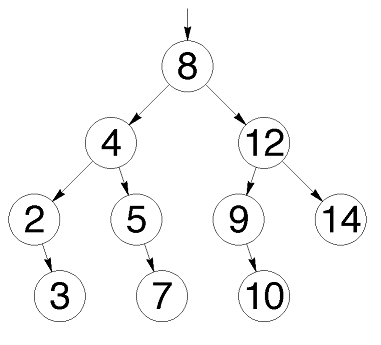

### Задание №2. 
Реализовать методы поиска в структуре данных "хеш-таблица". Организовать генерацию начального набора случайных данных. Для всех вариантов рехеширования добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.
#### Методы рехеширования:
- простое рехеширование;
- рехеширование с помощью псевдослучайных чисел;
- метод цепочек.

In [11]:
# Класс хеш-таблицы с методом простого рехеширования
class HashTableEasy:
    # Конструктор класса (инициализация значений)
    def __init__(self, table_size):
        self.table_size = table_size
        self.table = np.zeros((self.table_size, 2))
    
    # Функция хеширования
    def __hash__(self, value):
        result = 1
        while (value > 0):
            m = value % 10
            result = (result * m) % self.table_size
            value = value // 10
        return result
    
    # Метод добавления элемента в хеш-таблицу
    def add(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1][1] == 0):
            self.table[h1][0] = value
            self.table[h1][1] = 1
        else:
            i = 0
            h2 = h1
            while (self.table[h2][1] != 0 and i <= self.table_size):
                i = i + 1
                h2 = (h1 + i) % self.table_size
            if (i > self.table_size): print("Таблица заполнена!")
            else:
                self.table[h2][0] = value
                self.table[h2][1] = 1
    
    # Метод поиска элемента в хеш-таблице
    def find(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1][1] == 1):
            if (self.table[h1][0] == value): return h1
            else:
                i = 0
                h2 = h1
                while (self.table[h2][1] == 1 and i < self.table_size):
                    i = i + 1
                    h2 = (h1 + i) % self.table_size
                    if (self.table[h2][0] == value): return h2
                    if (self.table[h2][1] == 0): return -1
        else:
            return -1
    
    # Метод удаления элемента в хеш-таблице
    def remove(self, value):
        index = self.find(value)
        if (index != 1):
            self.table[index][1] = 0
            print("Элемент был успешно удалён!")
        else: print("Элемент не был найден в таблице!")
    
    # Метод для вывода таблицы
    def show(self):
        print(self.table)
    
    # Метод для очищения таблицы
    def clear(self):
        self.table = np.zeros((self.table_size, 2))

In [12]:
# Класс хеш-таблицы с рехешированием с помощью псевдослучайных чисел
class HashTableRand:
    # Конструктор класса (инициализация значений)
    def __init__(self, table_size):
        self.table_size = table_size
        self.table = np.zeros((self.table_size, 2))
        # Массив псевдослучайных чисел
        self.rand = np.zeros(self.table_size)
        self.rand = self.rand.astype(int)
        for i in range(1, self.table_size):
            self.rand[i] = int(random.randrange(1, 1000))
    
    # Функция хеширования
    def __hash__(self, value):
        result = 1
        while (value > 0):
            m = value % 10
            result = (result * m) % self.table_size
            value = value // 10
        return result
    
    # Метод добавления элемента в хеш-таблицу
    def add(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1][1] == 1):
            i = 0
            while (self.table[h1][1] == 1 and i < self.table_size):
                h1 = (h1 + self.rand[i]) % self.table_size
                i = i + 1
            if (i >= self.table_size):
                # Линейный поиск
                h1 = 0
                while (self.table[h1][1] != 0 and h1 < self.table_size):
                    h1 = h1 + 1
                if (h1 < self.table_size):
                    self.table[h1][0] = value
                    self.table[h1][1] = 1
                else: print("Таблица заполнена!")
            else:
                self.table[h1][0] = value
                self.table[h1][1] = 1
        else:
            self.table[h1][0] = value
            self.table[h1][1] = 1
    
    # Метод поиска элемента в хеш-таблице
    def find(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1][1] == 1):
            if (self.table[h1][0] == value): return h1
            else:
                i = 0
                while (self.table[h1][1] == 1 and i < self.table_size):
                    h1 = (h1 + self.rand[i]) % self.table_size
                    i = i + 1
                    if (self.table[h1][0] == value): return h1
                    if (self.table[h1][1] == 0): return -1
        else:
            return -1
    
    # Метод удаления элемента в хеш-таблице
    def remove(self, value):
        index = self.find(value)
        if (index != 1):
            self.table[index][1] = 0
            print("Элемент был успешно удалён!")
        else: print("Элемент не был найден в таблице!")
    
    # Метод для вывода таблицы
    def show(self):
        print(self.table)
    
    # Метод для очищения таблицы
    def clear(self):
        self.table = np.zeros((self.table_size, 2))

In [13]:
# Класс хеш-таблицы с рехешированием методом цепочки
class HashTableСhaining:
    # Конструктор класса (инициализация значений)
    def __init__(self, table_size):
        self.table_size = table_size
        self.table = []
        for i in range(0, self.table_size):
            self.table.append(None)
    
    # Функция хеширования
    def __hash__(self, value):
        result = 1
        while (value > 0):
            m = value % 10
            result = (result * m) % self.table_size
            value = value // 10
        return result
    
    # Метод добавления элемента в хеш-таблицу
    def add(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1] is None):
            self.table[h1] = [value]
        else:
            i = self.table[h1].append(value)
    
    # Метод поиска элемента в хеш-таблице
    def find(self, value):
        h1 = self.__hash__(value)
        if (self.table[h1] is None):
            return -1
        else:
            if (self.table[h1].count(value) > 0): return h1
            else: return -1
    
    # Метод удаления элемента в хеш-таблице
    def remove(self, value):
        index = self.find(value)
        if (index != 1):
            self.table[index].remove(value)
            print("Элемент был успешно удалён!")
        else: print("Элемент не был найден в таблице!")
    
    # Метод для вывода таблицы
    def show(self):
        print(self.table)
    
    # Метод для очищения таблицы
    def clear(self):
        self.table = np.zeros((self.table_size, 2))

In [ ]:
# Инициализация хеш-таблиц
CONST_N = 100000
tab1 = HashTableEasy(CONST_N)
tab2 = HashTableRand(CONST_N )
tab3 = HashTableСhaining(CONST_N)

# Генерация набора случайных данных (одна ячейка в каждой таблице пустая)
for i in range(1, CONST_N - 100):
    tab1.add(random.randrange(1, 1000))
    tab2.add(random.randrange(1, 1000))
    tab3.add(random.randrange(1, 1000))

# Вывод результатов
print("Первая хеш-таблица: ")
tab1.show()
print("\nВторая хеш-таблица: ")
tab2.show()
print("\nТретья хеш-таблица: ")
tab3.show()

In [15]:
# Замеры времени добавления элемента в хеш-таблицы
CONST_ADD = 1024

# Добавление элемента в хеш-таблицу с простым рехешированием
tic = time.process_time_ns()
tab1.add(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время добавления элемента в хеш-таблицу с простым рехешированием (мс): ", algo_time / 1000000)

# Добавление элемента в хеш-таблицу с рехешированием с помощью псевдослучайных чисел
tic = time.process_time_ns()
tab2.add(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время добавления элемента в хеш-таблицу с рехешированием с помощью псевдослучайных чисел (мс): ", algo_time / 1000000)

# Добавление элемента в хеш-таблицу с рехешированием методом цепочек
tic = time.process_time_ns()
tab3.add(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время добавления элемента в хеш-таблицу с рехешированием методом цепочек (мс): ", algo_time / 1000000)

Время добавления элемента в хеш-таблицу с простым рехешированием (мс):  46.875
Время добавления элемента в хеш-таблицу с рехешированием с помощью псевдослучайных чисел (мс):  31.25
Время добавления элемента в хеш-таблицу с рехешированием методом цепочек (мс):  0.0


In [16]:
# Замеры времени поиска элемента в хеш-таблицы

# Поиск элемента в хеш-таблице с простым рехешированием
tic = time.process_time_ns()
print(tab1.find(CONST_ADD))
toc = time.process_time_ns()
algo_time = toc - tic
print("Время поиска элемента в хеш-таблице с простым рехешированием (мс): ", algo_time / 1000000)

# Поиск элемента в хеш-таблице с рехешированием с помощью псевдослучайных чисел
tic = time.process_time_ns()
print(tab2.find(CONST_ADD))
toc = time.process_time_ns()
algo_time = toc - tic
print("Время поиска элемента в хеш-таблице с рехешированием с помощью псевдослучайных чисел (мс): ", algo_time / 1000000)

# Поиск элемента в хеш-таблице с рехешированием методом цепочек
tic = time.process_time_ns()
print(tab3.find(CONST_ADD))
toc = time.process_time_ns()
algo_time = toc - tic
print("Время поиска элемента в хеш-таблице с рехешированием методом цепочек (мс): ", algo_time / 1000000)

9899
Время поиска элемента в хеш-таблице с простым рехешированием (мс):  109.375
385
Время поиска элемента в хеш-таблице с рехешированием с помощью псевдослучайных чисел (мс):  78.125
0
Время поиска элемента в хеш-таблице с рехешированием методом цепочек (мс):  0.0


In [17]:
# Замеры времени удаления элемента и хеш-таблицы

# Удаление элемента из хеш-таблицы с простым рехешированием
tic = time.process_time_ns()
tab1.remove(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время удаления элемента из хеш-таблицы с простым рехешированием (мс): ", algo_time / 1000000)

# Удаление элемента из хеш-таблицы с рехешированием с помощью псевдослучайных чисел
tic = time.process_time_ns()
tab2.remove(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время удаления элемента из хеш-таблицы с рехешированием с помощью псевдослучайных чисел (мс): ", algo_time / 1000000)

# Удаление элемента из хеш-таблицы с рехешированием методом цепочек
tic = time.process_time_ns()
tab3.remove(CONST_ADD)
toc = time.process_time_ns()
algo_time = toc - tic
print("Время удаления элемента из хеш-таблицы с рехешированием методом цепочек (мс): ", algo_time / 1000000)

Элемент был успешно удалён!
Время удаления элемента из хеш-таблицы с простым рехешированием (мс):  109.375
Элемент был успешно удалён!
Время удаления элемента из хеш-таблицы с рехешированием с помощью псевдослучайных чисел (мс):  78.125
Элемент был успешно удалён!
Время удаления элемента из хеш-таблицы с рехешированием методом цепочек (мс):  0.0


### Задание №3.
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один их них не находился под "боем" другого. Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям.

In [18]:
# Объявляем константу и двумерный массив для представления шахматной доски
CONST_SIZE = 8
table = np.zeros((CONST_SIZE, CONST_SIZE), dtype = np.int8)

# Обнуляет массив
def clear(array):
    array = np.zeros((CONST_SIZE, CONST_SIZE), dtype = np.int8)
    return array

In [19]:
# Функция для проверки вертикалей шахматной доски
def vert(array):
    for i in range(0, CONST_SIZE):
        summa = 0
        for j in range(0, CONST_SIZE):
            summa = summa + array[j][i]
        if (summa > 1): 
            return False
    return True

# Функция для проверки диагоналей доски слева направо
def diag(array):
    # Левый крайний индекс от arr[7][0] до arr[1][0] включительно
    for i in range(CONST_SIZE - 1, 0, -1):
        summa = 0
        TposY = i
        TposX = 0
        while (TposX < CONST_SIZE and TposY < CONST_SIZE):
            summa = summa + array[TposY][TposX]
            TposX = TposX + 1
            TposY = TposY + 1
        if (summa > 1): 
            return False
    
    # Левый крайний индекс от arr[0][0] до arr[0][7] включительно
    for i in range(0, CONST_SIZE):
        summa = 0
        TposY = 0
        TposX = i
        while (TposX < CONST_SIZE and TposY < CONST_SIZE):
            summa = summa + array[TposY][TposX]
            TposX = TposX + 1
            TposY = TposY + 1
        if (summa > 1): 
            return False
    
    # Правый крайний индекс от arr[7][7] до arr[1][7] включительно
    for i in range(CONST_SIZE - 1, 0, -1):
        summa = 0
        TposY = i
        TposX = 7
        while (TposX >= 0 and TposY < CONST_SIZE):
            summa = summa + array[TposY][TposX]
            TposX = TposX - 1
            TposY = TposY + 1
        if (summa > 1): 
            return False
    
    # Правый крайний индекс от arr[0][7] до arr[0][0] включительно
    for i in range(CONST_SIZE - 1, 0, -1):
        summa = 0
        TposY = 0
        TposX = i
        while (TposX < CONST_SIZE and TposY < CONST_SIZE):
            summa = summa + array[TposY][TposX]
            TposX = TposX - 1
            TposY = TposY + 1
        if (summa > 1): 
            return False
    
    # Если в каждой диагонали по одной единице
    return True

In [20]:
# Функция поиска позиций
def search(array):
    count = 0
    for i in range(0, CONST_SIZE):
        for j in range(0, CONST_SIZE):
            for k in range(0, CONST_SIZE):
                for l in range(0, CONST_SIZE):
                    for m in range(0, CONST_SIZE):
                        for n in range(0, CONST_SIZE):
                            for o in range(0, CONST_SIZE):
                                for p in range(0, CONST_SIZE):
                                    array[0][i] = 1
                                    array[1][j] = 1
                                    array[2][k] = 1
                                    array[3][l] = 1
                                    array[4][m] = 1
                                    array[5][n] = 1
                                    array[6][o] = 1
                                    array[7][p] = 1
                                    flag = vert(array) and diag(array)
                                    if flag:
                                        print("\n", array, "\n")
                                        return
                                    else: 
                                        array = clear(array)
search(table)


 [[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]] 



### Вывод:
В ходе данной лабораторной работы я научилась реализовывать различные методы поиска (бинарный, фибоначчиев и интерполяционный), а также реализовать структуру данных "бинарное дерево".